# Лабораторная работа № 1

Подключим библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Загружаем данные

In [2]:
data = pd.read_csv('Admission_Predict.csv', sep=",")

Этот набор данных предназначен для прогнозирования перспективы приема студентов из Индии.

Набор данных содержит несколько параметров, которые считаются важными при подаче заявки на магистерские программы. Параметры включают в себя: 
1. GRE баллов (из 340) 
2. TOEFL баллов (из 120) 
3. Университетский рейтинг (из 5) 
4. Заявление о цели и рекомендательное письмо сила (из 5) 
5. Бакалавриат Средний балл (из 10) 
6. Опыт исследования (0 или 1) 
7. Вероятность поступления (от 0 до 1)

## Основные характерисики набора данных

#### Первые 5 строк датасета

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Размер датасета

In [4]:
data.shape

(400, 9)

В этом датасете 400 строк и 9 столбцов

#### Список столбцов

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#### Типы данных

In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

#### Проверим все строки на наличие пустых записей

In [7]:
for col in data.columns:
  null_count = data[data[col].isnull()].shape[0]
  print('{} - {}'.format(col, null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


Пустых записей нет

#### Основные статистические характеристки набора данных

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### Основные статистические характеристки набора данных

In [9]:
print(data['Chance of Admit '].unique())

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.63 0.64 0.7  0.94 0.95 0.97 0.44 0.46 0.74 0.91 0.88
 0.58 0.48 0.49 0.53 0.87 0.86 0.89 0.82 0.56 0.36 0.42 0.47 0.55 0.57
 0.96 0.93 0.38 0.34 0.79 0.71 0.69 0.59 0.85 0.77 0.81 0.83 0.67 0.73
 0.6  0.43 0.51 0.39]


Целевой признак содержит значения в интервале от 0 до 1

## Визуальное исследование датасета

#### Построим диаграмму рассеивания

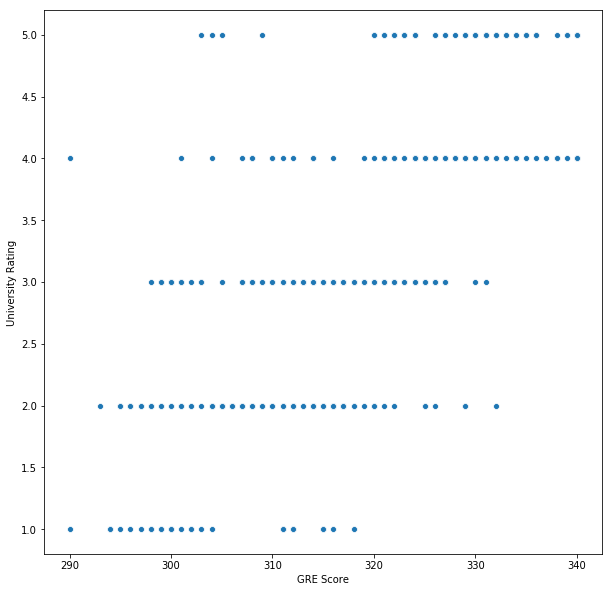

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='University Rating', data=data)

Можно видеть, что несмотря на разброс значений, между количеством GRE баллов и Рейтингом университета есть почти что линейная зависимость. Чем лчше университет, тем больше баллов получит судент.

Посмотрим насколько на эту зависимость влияет целевой признак.

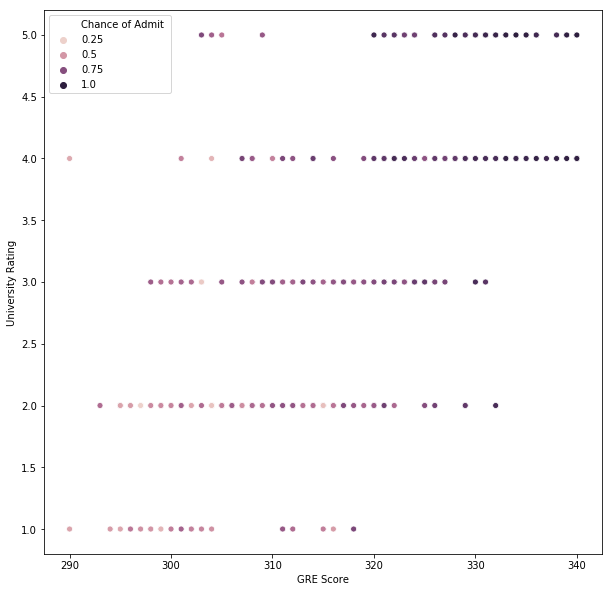

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', 
                y='University Rating', data=data, 
                hue='Chance of Admit ')

Видно, что шанс поступления гораздо выше, если у ВУЗа хороший рейтинг и хорошо сдан GRE

#### Гистограмма

Определим плотность распределения данных

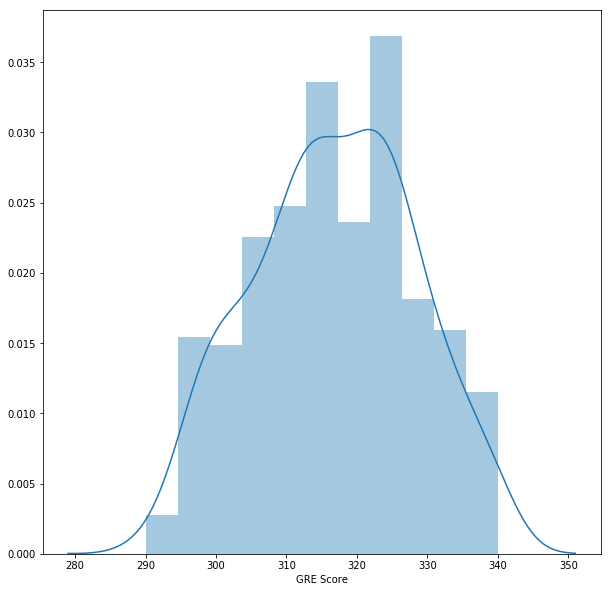

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['GRE Score'])

#### Jointplot

Комбинация гистограмм и диаграмм рассеивания.

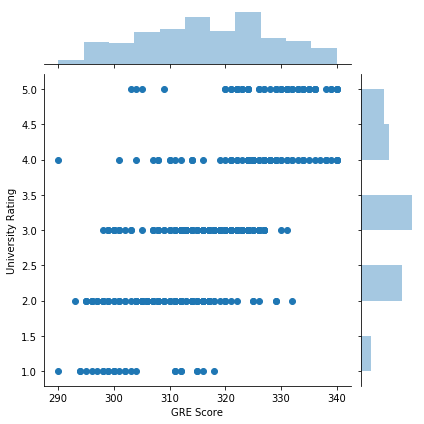

In [13]:
sns.jointplot(x='GRE Score', y='University Rating', data=data)

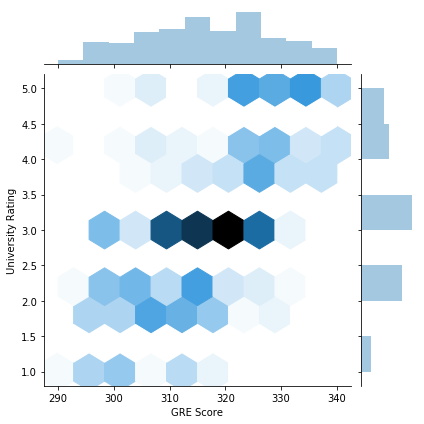

In [14]:
sns.jointplot(x='GRE Score', y='University Rating', data=data, kind="hex")

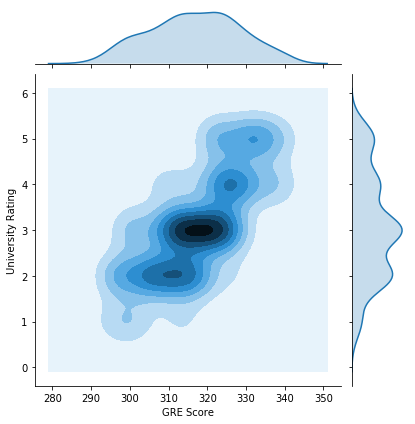

In [15]:
sns.jointplot(x='GRE Score', y='University Rating', data=data, kind="kde")

#### "Парные диаграммы"

Построим диаграммы и гистаграммы для всего набора данных

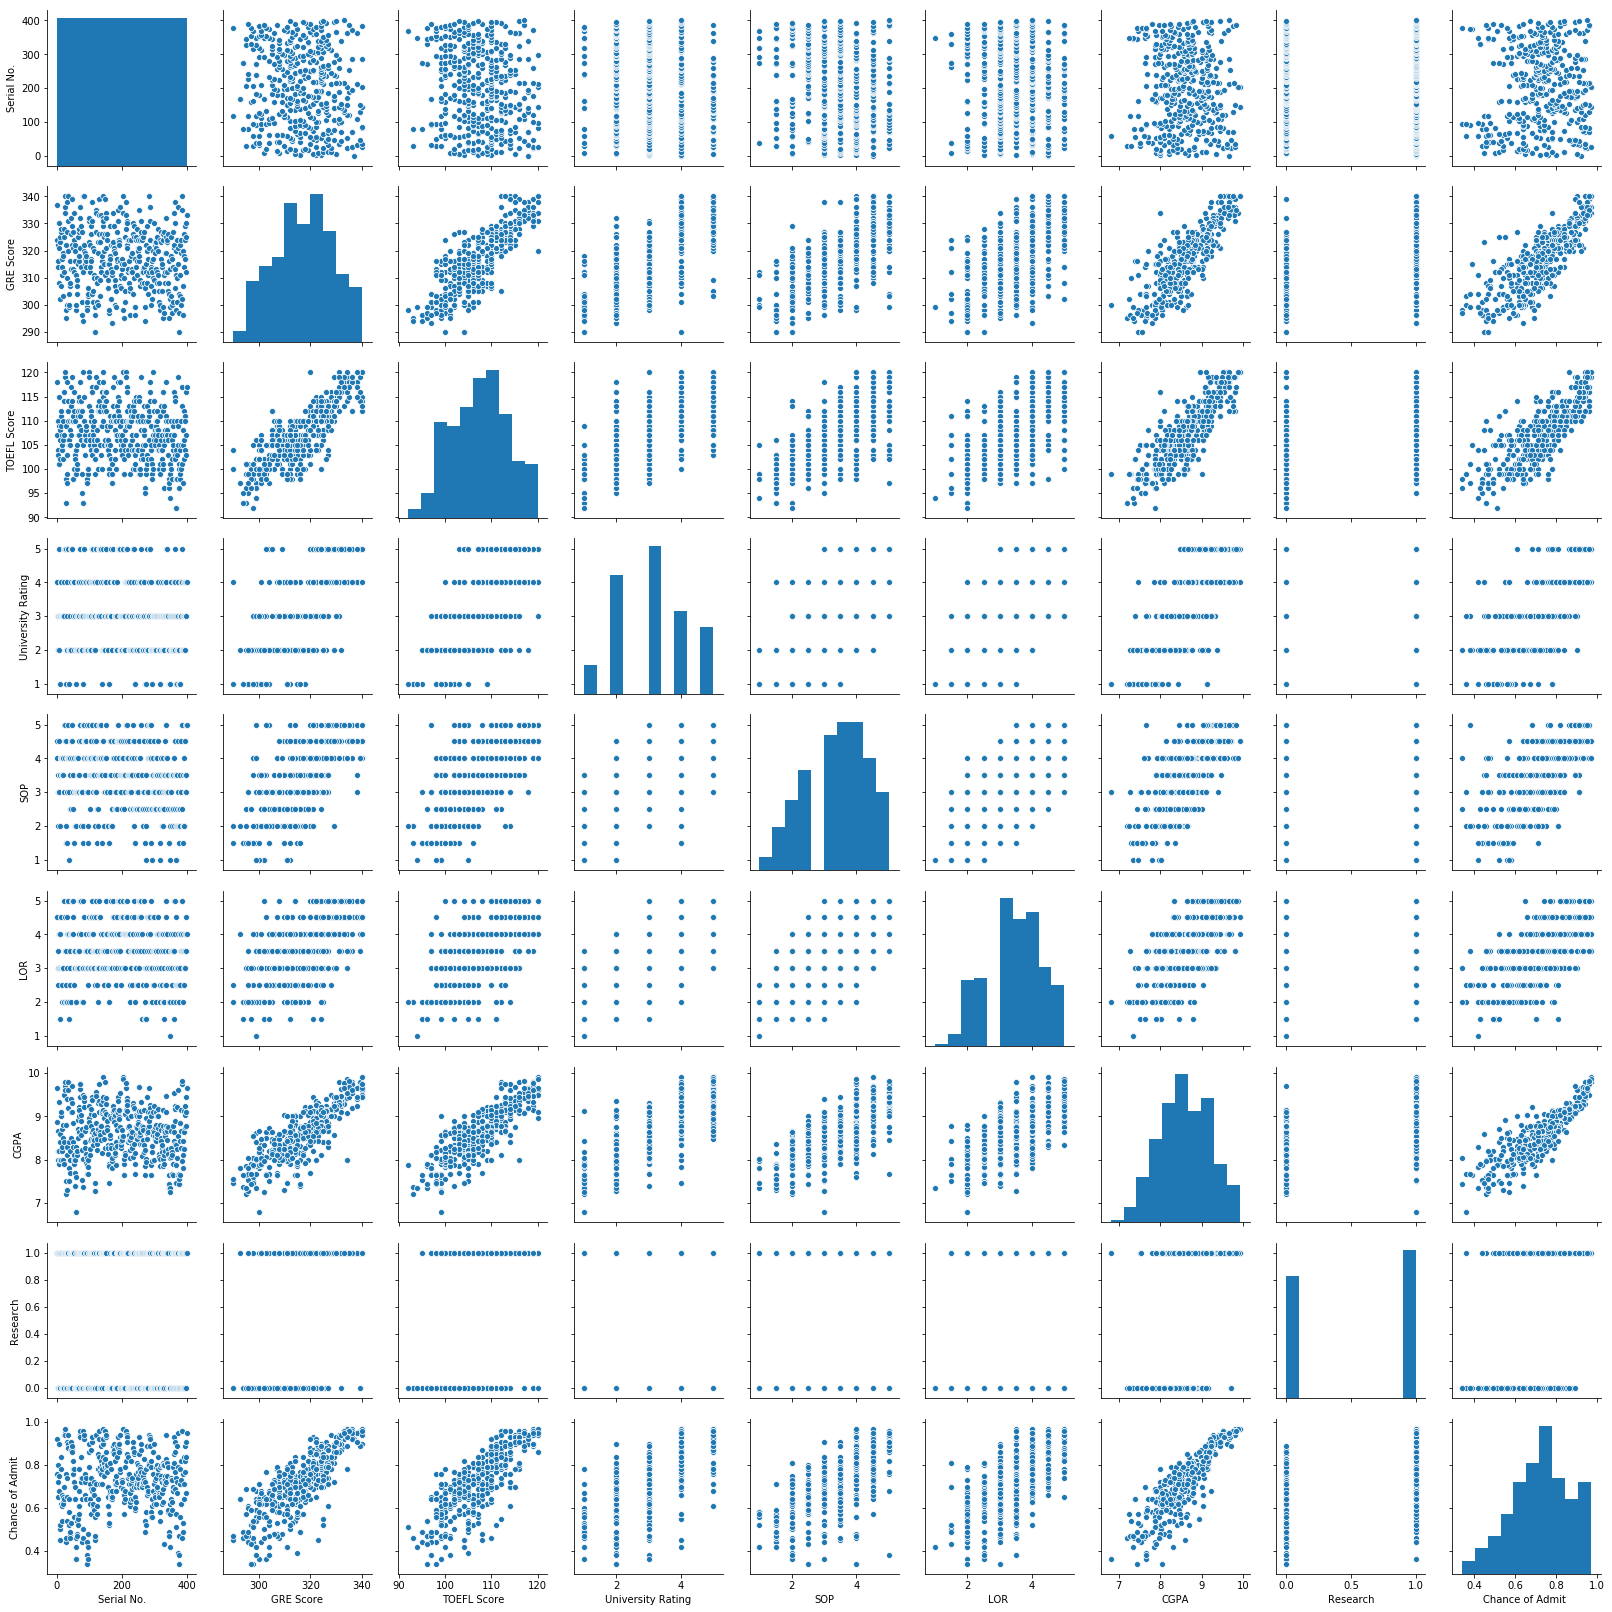

In [16]:
sns.pairplot(data)

#### Ящик с усами

Отображает одномерное распределение вероятности.

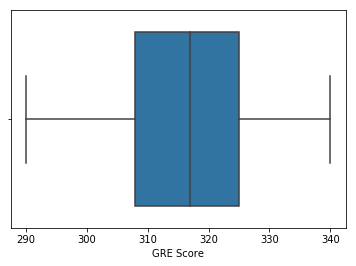

In [17]:
sns.boxplot(x=data['GRE Score'])

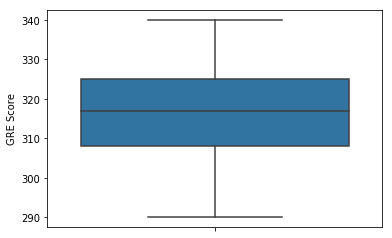

In [18]:
sns.boxplot(y=data['GRE Score'])

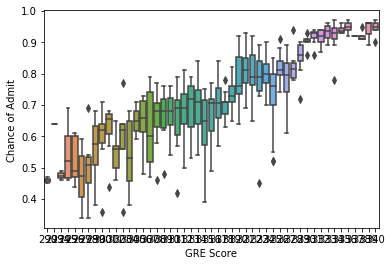

In [19]:
sns.boxplot(x=data['GRE Score'], y=data['Chance of Admit '], data=data)

#### Violin Plot

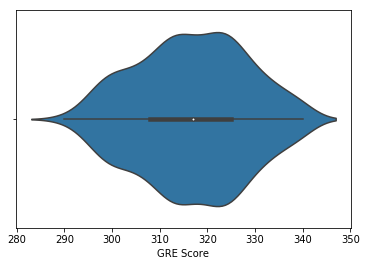

In [20]:
sns.violinplot(x=data['GRE Score'])

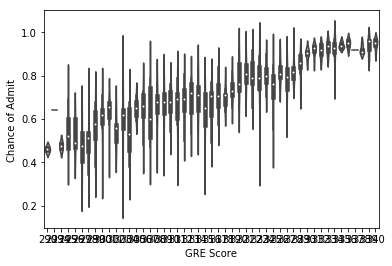

In [21]:
sns.violinplot(x=data['GRE Score'], y=data['Chance of Admit '], data=data)

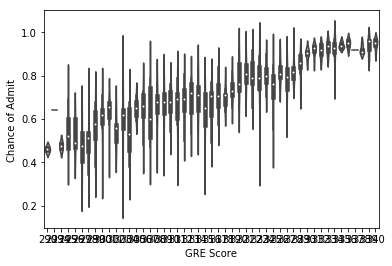

In [22]:
sns.violinplot(x=data['GRE Score'], y=data['Chance of Admit '], data=data, kind="violin", split=True)

## Корреляция

In [23]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Целевой признак наиболее сильно коррелирует с CGPA (0.87) и GRE (0.8). Эти признаки обязательно следует оставить в модели.
Целевой признак отчасти коррелирует со всеми признаками  из них нечего удалить.


In [24]:
data.corr(method='pearson')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [25]:
data.corr(method='kendall')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.064791,-0.101776,-0.119730,-0.121769,-0.057908,-0.033369,-0.051616,0.020912
GRE Score,-0.064791,1.000000,0.667509,0.544494,0.467137,0.414973,0.659007,0.492727,0.639933
TOEFL Score,-0.101776,0.667509,1.000000,0.567294,0.514420,0.424169,0.653665,0.421512,0.625485
University Rating,-0.119730,0.544494,0.567294,1.000000,0.638358,0.547389,0.611896,0.411914,0.599076
SOP,-0.121769,0.467137,0.514420,0.638358,1.000000,0.600787,0.565253,0.385807,0.545497
LOR,-0.057908,0.414973,0.424169,0.547389,0.600787,1.000000,0.510758,0.350789,0.518433
CGPA,-0.033369,0.659007,0.653665,0.611896,0.565253,0.510758,1.000000,0.434767,0.720655
Research,-0.051616,0.492727,0.421512,0.411914,0.385807,0.350789,0.434767,1.000000,0.480270
Chance of Admit,0.020912,0.639933,0.625485,0.599076,0.545497,0.518433,0.720655,0.480270,1.000000


In [26]:
data.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.093525,-0.146489,-0.161542,-0.170409,-0.081427,-0.042829,-0.063138,0.038328
GRE Score,-0.093525,1.000000,0.831860,0.676265,0.613743,0.547786,0.831848,0.595911,0.815352
TOEFL Score,-0.146489,0.831860,1.000000,0.696868,0.652922,0.549405,0.825720,0.504322,0.795573
University Rating,-0.161542,0.676265,0.696868,1.000000,0.740387,0.653256,0.750562,0.454131,0.731977
SOP,-0.170409,0.613743,0.652922,0.740387,1.000000,0.727178,0.724348,0.443648,0.694715
LOR,-0.081427,0.547786,0.549405,0.653256,0.727178,1.000000,0.666012,0.400385,0.670562
CGPA,-0.042829,0.831848,0.825720,0.750562,0.724348,0.666012,1.000000,0.530265,0.878403
Research,-0.063138,0.595911,0.504322,0.454131,0.443648,0.400385,0.530265,1.000000,0.581742
Chance of Admit,0.038328,0.815352,0.795573,0.731977,0.694715,0.670562,0.878403,0.581742,1.000000


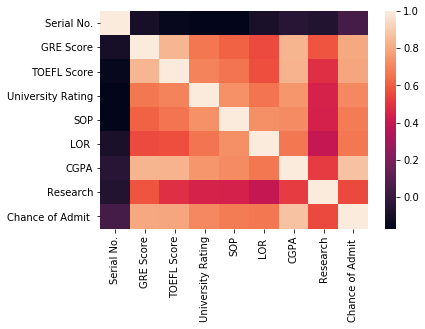

In [27]:
sns.heatmap(data.corr())

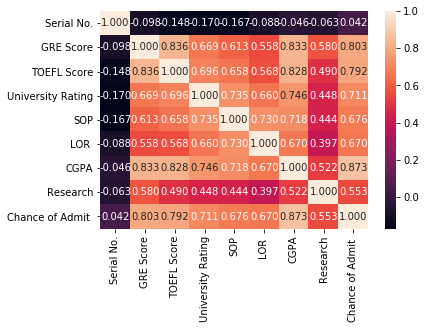

In [28]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

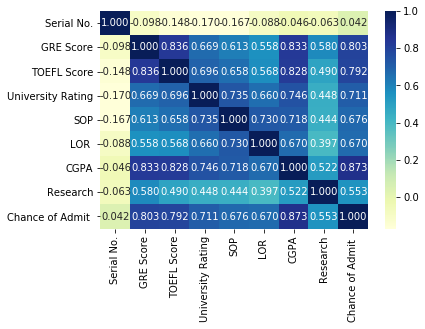

In [29]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

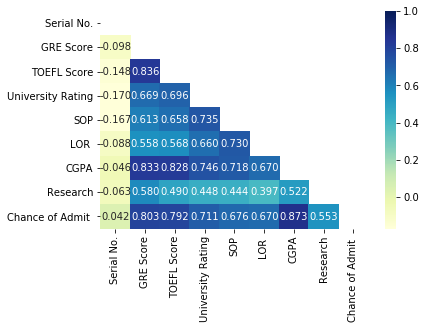

In [30]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, cmap='YlGnBu', annot=True, fmt='.3f')

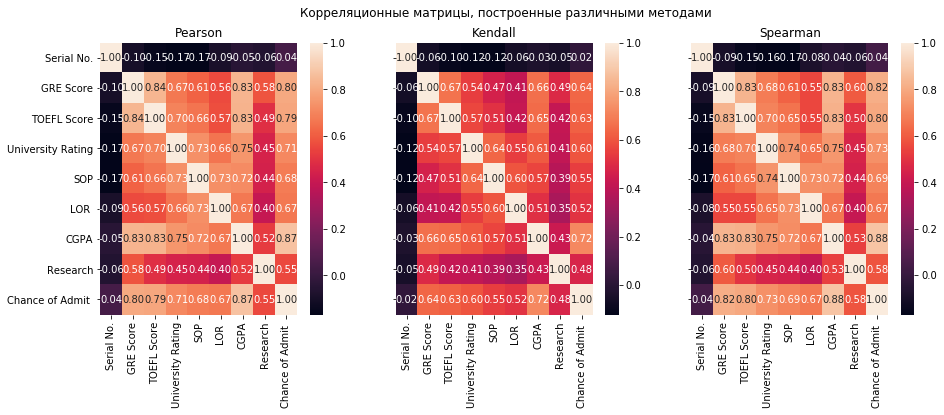

In [31]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')